<a href="https://colab.research.google.com/github/kujaharuka/free/blob/main/Fillna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
missing_data_summary = df.isnull().sum()

In [ ]:
df['Age'] = pd.to_numeric(df['Age']).round().astype('Int64', errors='ignore')

In [ ]:
df['Fare'] = pd.to_numeric(df['Fare']).round().astype('Int64', errors='ignore')

In [ ]:
df['Name'] = df['Name'].astype("category")

In [ ]:
df['Sex'] = df['Sex'].astype("category")

In [ ]:
df['Cabin'] = df['Cabin'].astype("category")

In [ ]:
df['Embarked'] = df['Embarked'].astype("category")

In [ ]:
df['Ticket'] = df['Ticket'].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    Int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    Int64   
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: Int64(2), category(5), int64(5)
memory usage: 123.8 KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df["Age"].fillna(df['Age'].mean(0).astype('int'))

,Age
0,22
1,38
2,26
3,35
4,35
...,...
886,27
887,19
888,29
889,26


In [ ]:
df["Cabin"].fillna(df['Cabin'].mode(0),inplace = True)

<ipython-input-38-654158062807>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cabin"].fillna(df['Cabin'].mode(0),inplace = True)


In [ ]:
df["Embarked"].fillna(df['Embarked'].mode(0),inplace = True)

<ipython-input-39-954d43566ed9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df['Embarked'].mode(0),inplace = True)


In [ ]:
df['Name'].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [ ]:
numerical_df = df.select_dtypes(include=['number'])

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=5)

In [ ]:
df_imputed = imputer.fit_transform(numerical_df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = {
    'Survived': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Pclass': [3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
'Age': [22.0, 38.0, 26.0, 35.0, 35.0, 22.0, 22.0, 38.0, 26.0, 35.0],
    }
df = pd.DataFrame(data)

In [ ]:
X = df[['Survived']]  # Features (use double brackets to keep it as a DataFrame)
y = df['Age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 15.15625


In [ ]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 32.5
Coefficient: [-6.25]


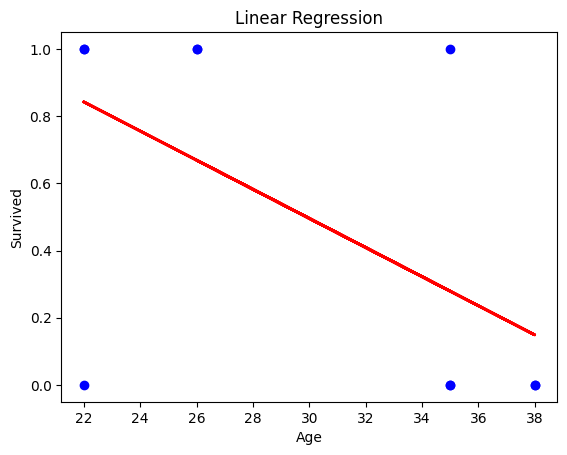

In [ ]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Linear Regression')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.array(df['Age']).reshape((-1, 1))
y = df['Survived']

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
y_pred = model.predict(x)

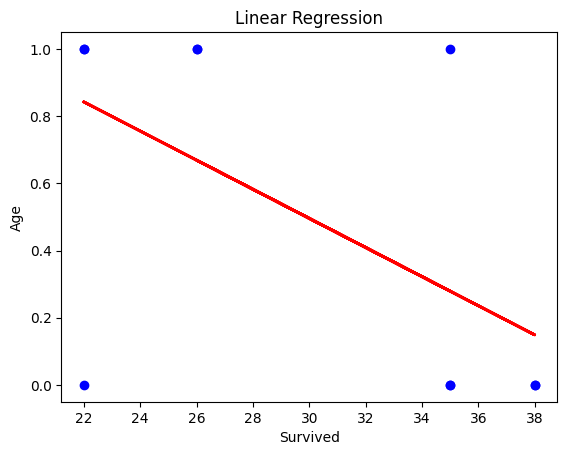

In [ ]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=2)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Linear Regression')
plt.show()